In [1]:
import pandas as pd

df = pd.read_pickle('sokureplays.pkl')

In [3]:
# Convert Unix timestamps to datetime
df['datetime'] = pd.to_datetime(df['time'], unit='ns')

# Extract month and year from datetime
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

In [11]:
monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='count')

In [13]:
monthly_counts

,year,month,count
0,2019,10,1706
1,2019,11,9302
2,2019,12,17542
3,2020,1,23560
4,2020,2,18811
5,2020,3,12208
6,2020,4,17676
7,2020,5,20351
8,2020,6,12837
9,2020,7,20653


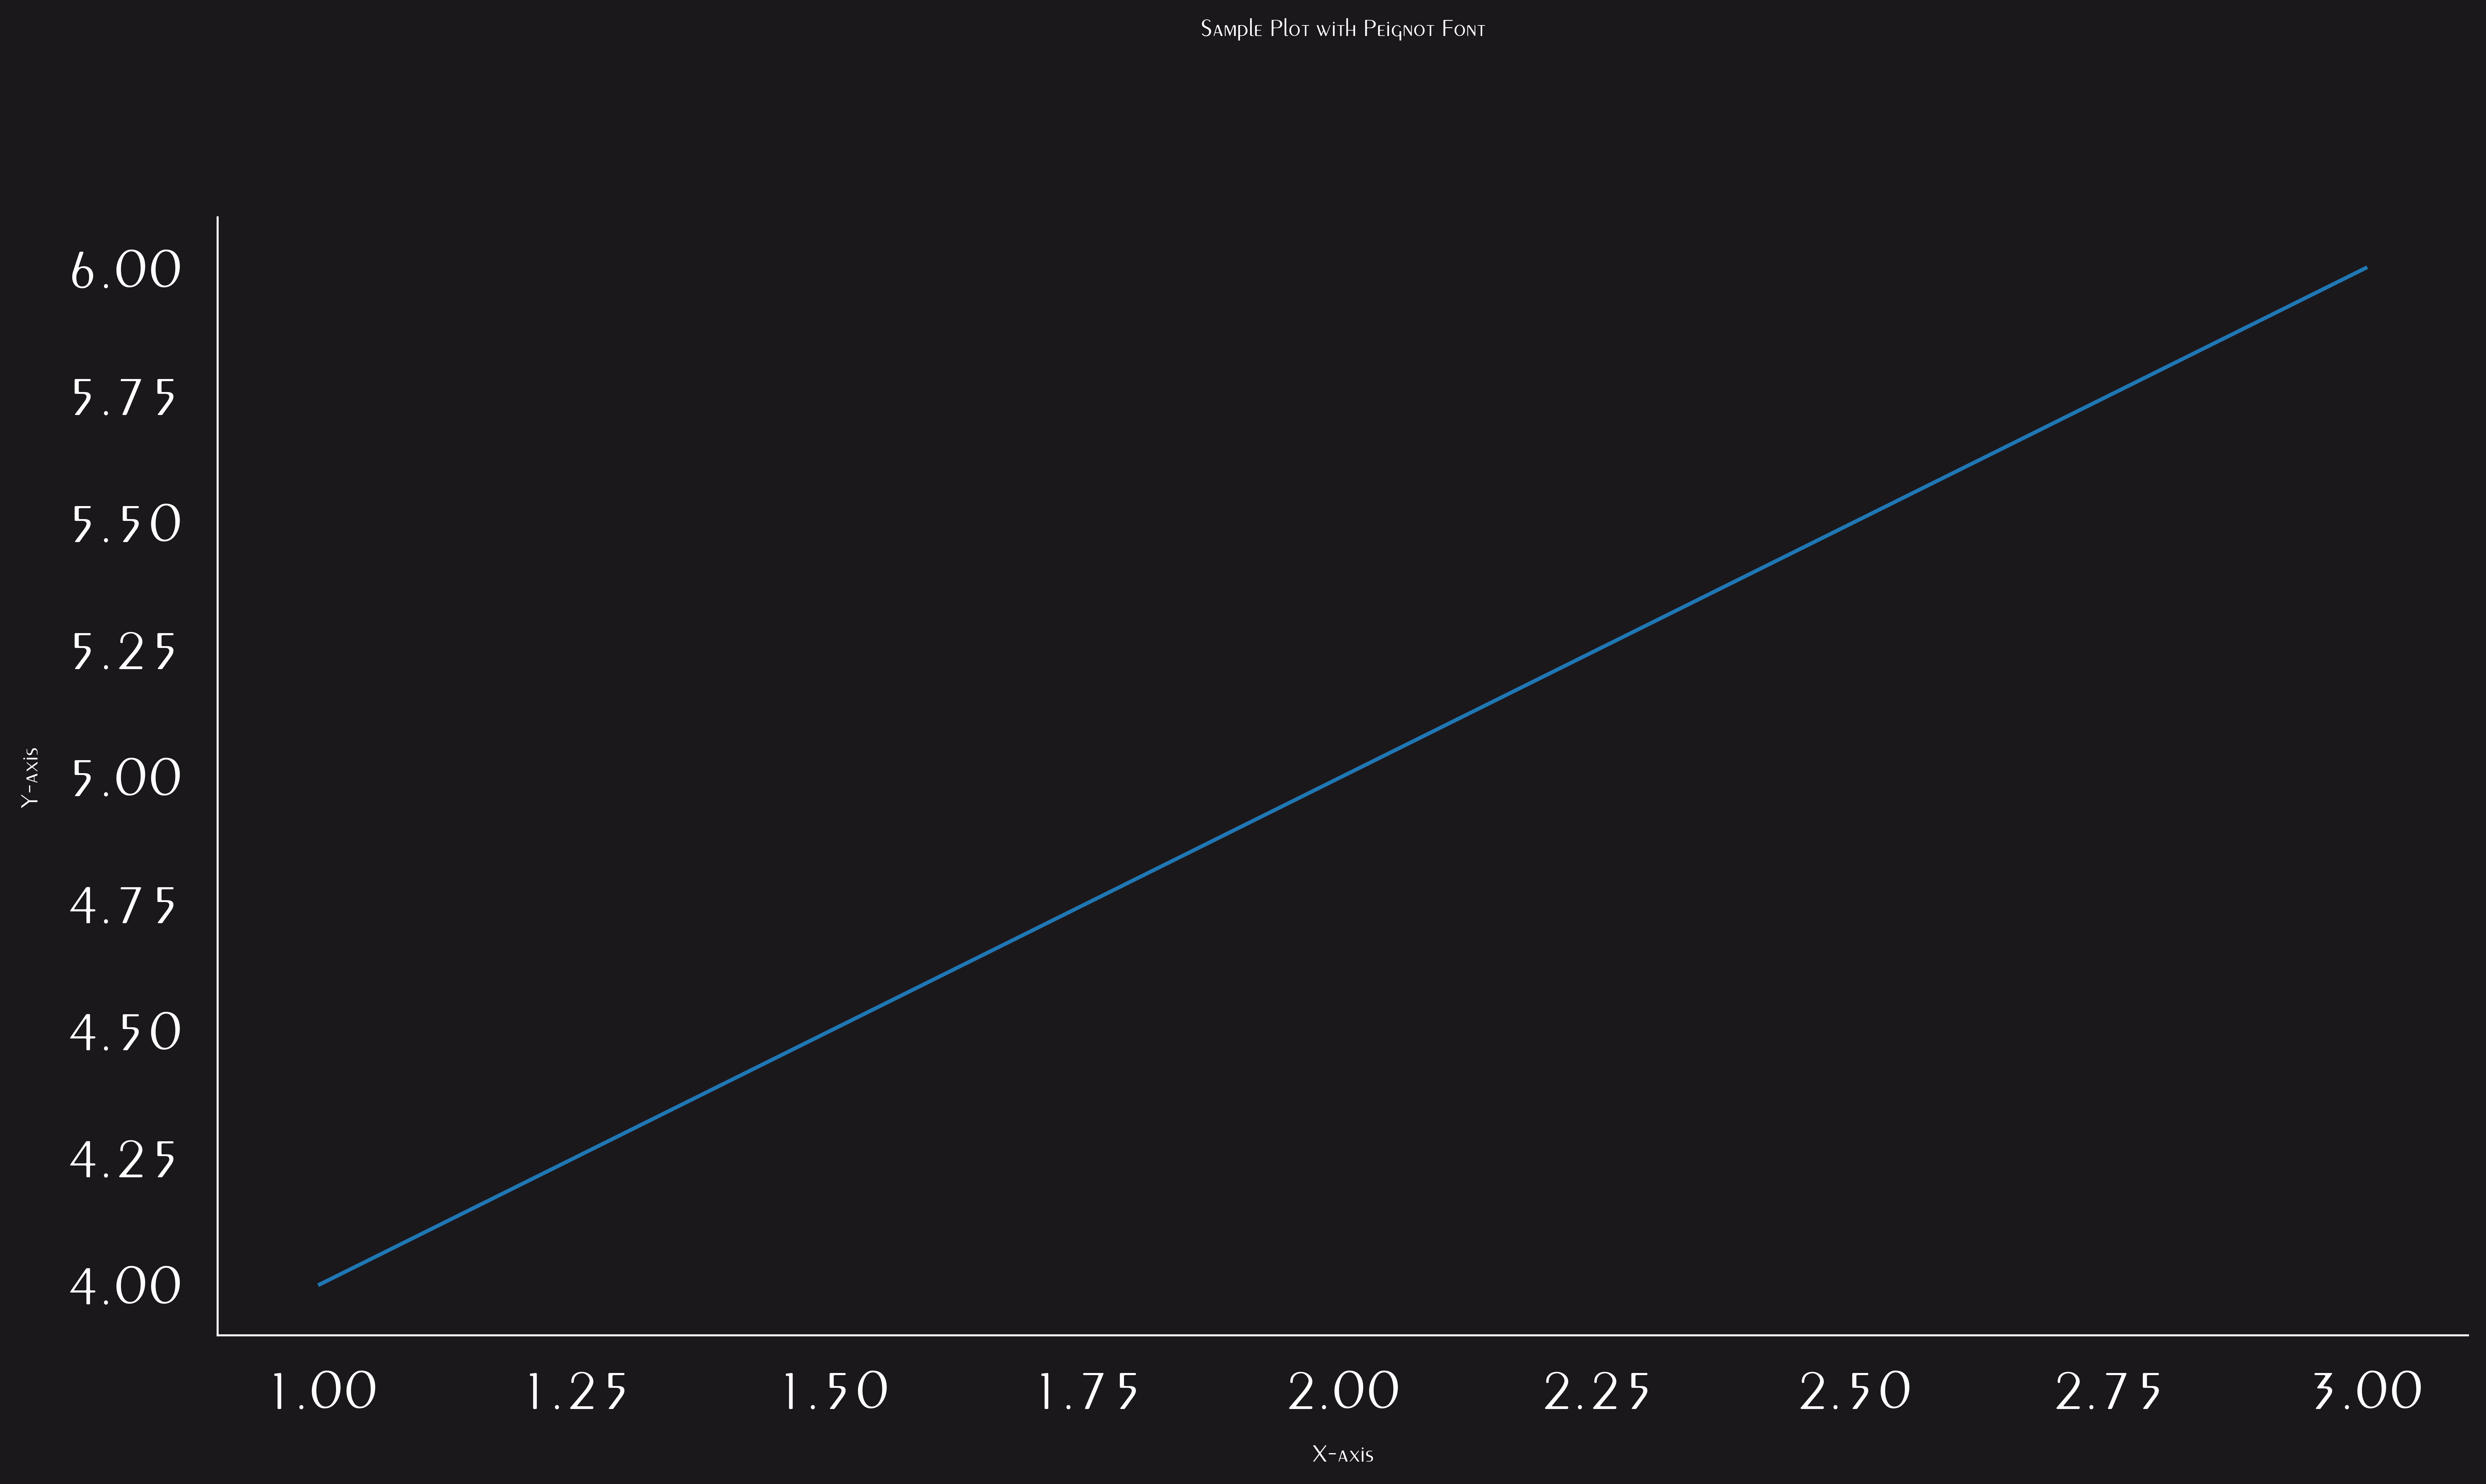

In [6]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# Path to the Peignot font file (update this to the correct path on your system)
font_path = "Peignot.ttf"

# Add the font to Matplotlib's font manager
fm.fontManager.addfont(font_path)

# Create a FontProperties object for Peignot
prop = fm.FontProperties(fname=font_path)

# @title Colors
colors = ["#648FFF", "#785EF0", "#DC267F", "#FE6100", "#FFB000", "#000000", "#FFFFFF"]
colors_grad = sns.color_palette('flare_r', 12)
colors_heat1 = sns.color_palette('flare_r', as_cmap=True)
colors_heat2 = sns.diverging_palette(315, 261, s=74, l=50, center='dark', as_cmap=True)

color_bg = "#1B181C"
color_text = "#FFFFFF"

# @title Plot settings
mpl.rcParams['figure.dpi'] = 600
mpl.rcParams["figure.figsize"] = 16, 8

# Set default font properties for all text elements
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = prop.get_name()

# Title
mpl.rcParams['figure.titlesize'] = 32
mpl.rcParams['axes.titlesize'] = 32
mpl.rcParams['axes.titleweight'] = 'bold'

# Labels
mpl.rcParams['axes.labelsize'] = 22
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['ytick.labelsize'] = 22

# Spacing
mpl.rcParams['axes.titlepad'] = 72
mpl.rcParams['axes.labelpad'] = 10
mpl.rcParams['xtick.major.pad'] = 10
mpl.rcParams['ytick.major.pad'] = 10
mpl.rcParams['xtick.major.width'] = 0
mpl.rcParams['xtick.minor.width'] = 0
mpl.rcParams['ytick.major.width'] = 0
mpl.rcParams['ytick.minor.width'] = 0

# Spines and grids
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.grid'] = False

# Legends
mpl.rcParams['legend.title_fontsize'] = 18
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['legend.frameon'] = False

# Bars
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

# Colors
mpl.rcParams["figure.facecolor"] = color_bg
mpl.rcParams["axes.facecolor"] = color_bg
mpl.rcParams["savefig.facecolor"] = color_bg

# Text colors
mpl.rcParams['text.color'] = color_text
mpl.rcParams['axes.labelcolor'] = color_text
mpl.rcParams['xtick.color'] = color_text
mpl.rcParams['ytick.color'] = color_text

# Line colors
mpl.rcParams['axes.edgecolor'] = color_text

In [31]:
# Create a new column for 'year-month'
monthly_counts['year_month'] = monthly_counts['year'].astype(str) + '-' + monthly_counts['month'].astype(str).str.zfill(2)

# Sort by 'year' and 'month'
monthly_counts = monthly_counts.sort_values(by=['year', 'month'])

# Plotting
plt.figure(figsize=(16, 9))
plt.bar(monthly_counts['year_month'], monthly_counts['count'], color='skyblue')
plt.xlabel('Year-Month')
plt.ylabel('Games')
plt.title('Soku Games Recorded per Month')
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()